In [1]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils

In [2]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [3]:
import tensorflow as tf
from tensorflow import keras

# Importar Arrays de Entrenamiento, Validación y Prueba

In [4]:
with open('dataset/generado/paciente1/array_Xtrain.npy', 'rb') as f:
    array_Xtrain = np.load(f)

In [5]:
len(array_Xtrain)

1523

In [6]:
with open('dataset/generado/paciente1/array_Ytrain.npy', 'rb') as f:
    array_Ytrain = np.load(f)

In [7]:
len(array_Ytrain)

1523

In [8]:
with open('dataset/generado/paciente1/array_Xval.npy', 'rb') as f:
    array_Xval = np.load(f)

In [9]:
len(array_Xval)

190

In [10]:
with open('dataset/generado/paciente1/array_Yval.npy', 'rb') as f:
    array_Yval = np.load(f)

In [11]:
len(array_Yval)

190

In [12]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [13]:
len(array_Xtest)

191

In [14]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [15]:
len(array_Ytest)

191

# Entrenamiento Vanilla LSTM con dropout

In [16]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4864      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 64)                2112      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 3

In [17]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/vanilla_dropout.h5')

Epoch 1/50
48/48 [==============================] - 7s 32ms/step - loss: 0.0264 - mae: 0.1269 - mse: 0.0264 - val_loss: 0.0085 - val_mae: 0.0785 - val_mse: 0.0085
Epoch 2/50
48/48 [==============================] - 1s 16ms/step - loss: 0.0153 - mae: 0.0958 - mse: 0.0153 - val_loss: 0.0069 - val_mae: 0.0687 - val_mse: 0.0069
Epoch 3/50
48/48 [==============================] - 1s 24ms/step - loss: 0.0119 - mae: 0.0863 - mse: 0.0119 - val_loss: 0.0065 - val_mae: 0.0678 - val_mse: 0.0065
Epoch 4/50
48/48 [==============================] - 1s 28ms/step - loss: 0.0111 - mae: 0.0832 - mse: 0.0111 - val_loss: 0.0066 - val_mae: 0.0680 - val_mse: 0.0066
Epoch 5/50
48/48 [==============================] - 1s 23ms/step - loss: 0.0102 - mae: 0.0803 - mse: 0.0102 - val_loss: 0.0058 - val_mae: 0.0617 - val_mse: 0.0058
Epoch 6/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0092 - mae: 0.0754 - mse: 0.0092 - val_loss: 0.0056 - val_mae: 0.0612 - val_mse: 0.0056
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 12ms/step - loss: 0.0046 - mae: 0.0518 - mse: 0.0046
test loss, test acc: [0.004564362578094006, 0.0517905168235302, 0.004564362578094006]


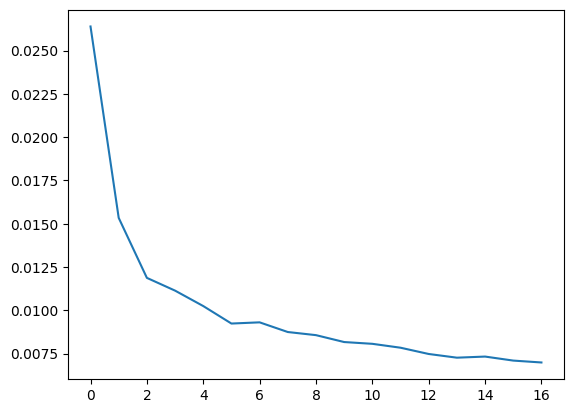

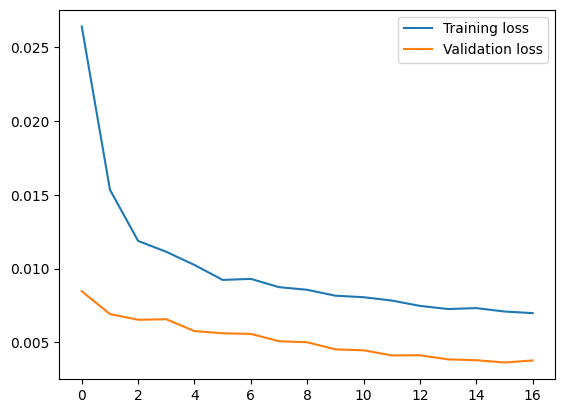

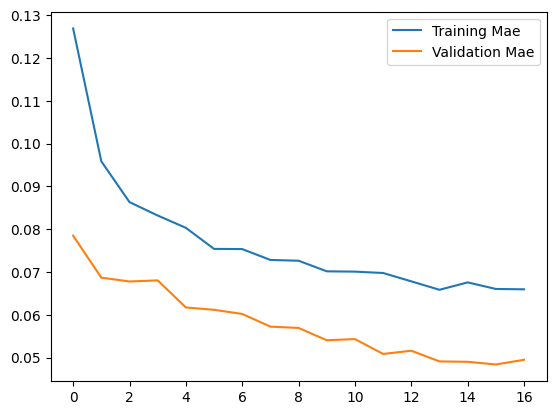

In [18]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 11ms/step


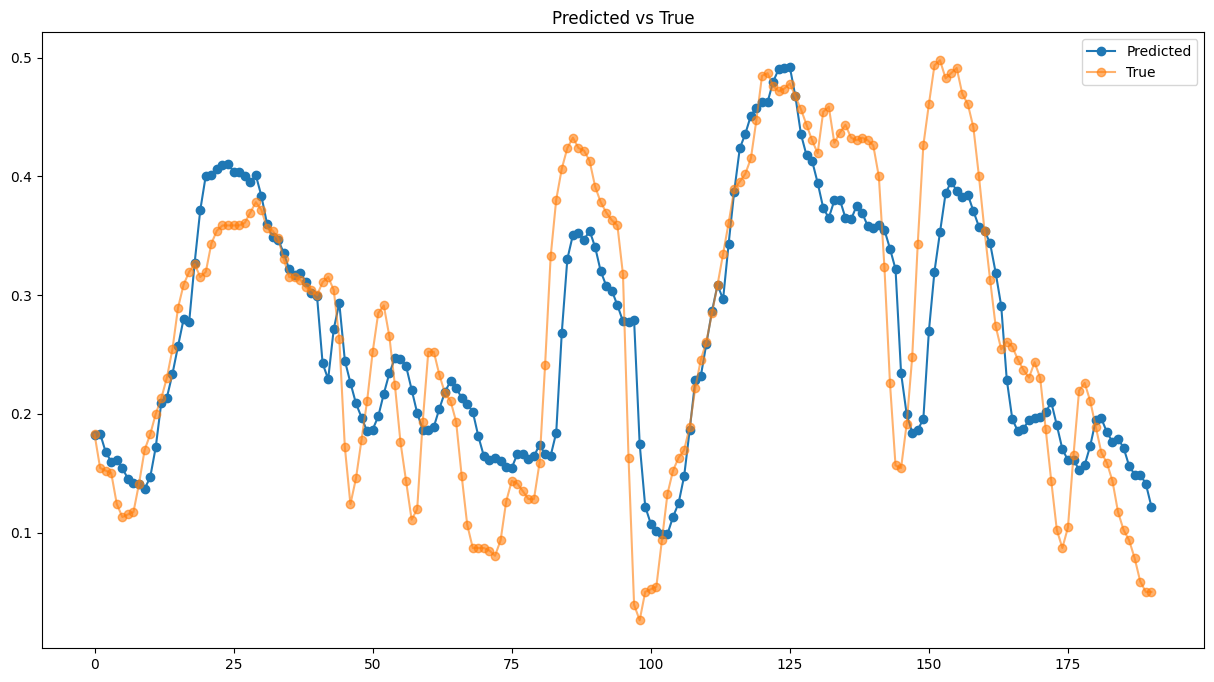

In [19]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [20]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05179051807298222,
 'mse': 0.06756006406011335,
 'rmse': 0.00456436225580662}

# Entrenamiento Vanilla LSTM sin dropout

In [21]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 32)                4864      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 9,089
Trainable params: 9,089
Non-trainable params: 0
_________________________________________________________________


In [22]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/vanilla_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 5s 39ms/step - loss: 0.0211 - mae: 0.1141 - mse: 0.0211 - val_loss: 0.0099 - val_mae: 0.0849 - val_mse: 0.0099
Epoch 2/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0095 - mae: 0.0772 - mse: 0.0095 - val_loss: 0.0081 - val_mae: 0.0775 - val_mse: 0.0081
Epoch 3/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0082 - mae: 0.0716 - mse: 0.0082 - val_loss: 0.0070 - val_mae: 0.0709 - val_mse: 0.0070
Epoch 4/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0077 - mae: 0.0696 - mse: 0.0077 - val_loss: 0.0065 - val_mae: 0.0671 - val_mse: 0.0065
Epoch 5/50
48/48 [==============================] - 1s 17ms/step - loss: 0.0072 - mae: 0.0674 - mse: 0.0072 - val_loss: 0.0061 - val_mae: 0.0638 - val_mse: 0.0061
Epoch 6/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0069 - mae: 0.0660 - mse: 0.0069 - val_loss: 0.0057 - val_mae: 0.0615 - val_mse: 0.0057
Epoch 7/50
48/48 [====

6/6 [==============================] - 0s 8ms/step - loss: 0.0040 - mae: 0.0503 - mse: 0.0040
test loss, test acc: [0.003992293495684862, 0.050338514149188995, 0.003992293495684862]


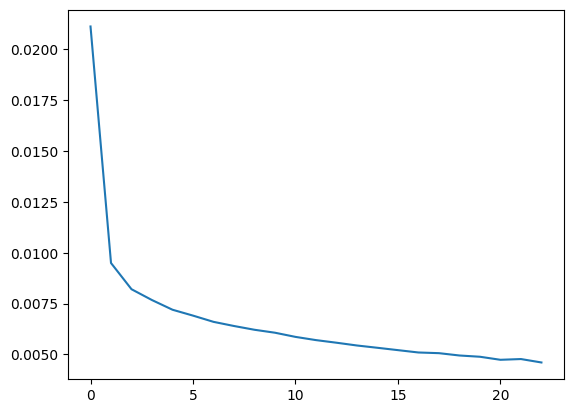

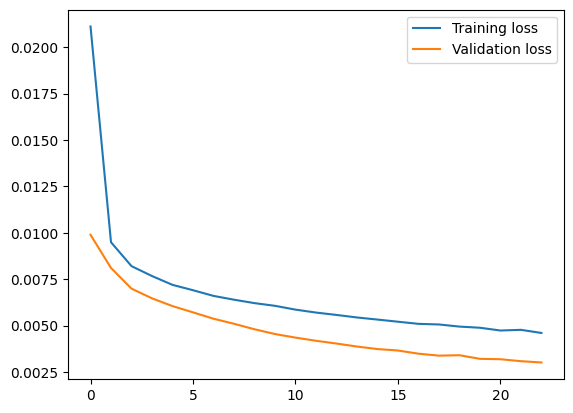

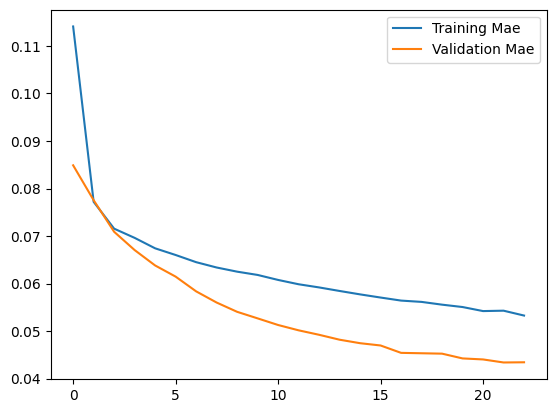

In [23]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 7ms/step


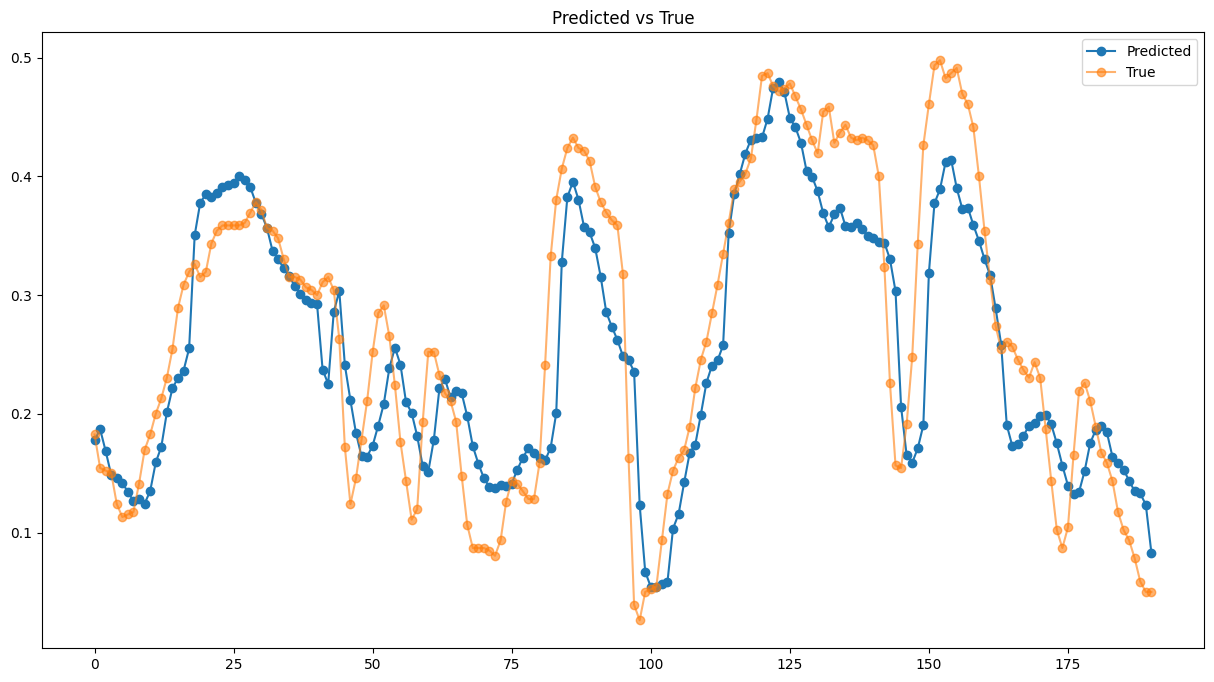

In [24]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [25]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.05033851232394091,
 'mse': 0.063184599960452,
 'rmse': 0.003992293672162352}

# Entrenamiento Stacked LSTM con dropout

In [26]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_3 (LSTM)               (None, 32)                8320      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)               

In [27]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/stacked_dropout.h5')

Epoch 1/50
48/48 [==============================] - 11s 44ms/step - loss: 0.0231 - mae: 0.1202 - mse: 0.0231 - val_loss: 0.0119 - val_mae: 0.0937 - val_mse: 0.0119
Epoch 2/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0163 - mae: 0.1003 - mse: 0.0163 - val_loss: 0.0105 - val_mae: 0.0875 - val_mse: 0.0105
Epoch 3/50
48/48 [==============================] - 2s 38ms/step - loss: 0.0151 - mae: 0.0981 - mse: 0.0151 - val_loss: 0.0107 - val_mae: 0.0892 - val_mse: 0.0107
Epoch 4/50
48/48 [==============================] - 2s 45ms/step - loss: 0.0136 - mae: 0.0922 - mse: 0.0136 - val_loss: 0.0104 - val_mae: 0.0874 - val_mse: 0.0104
Epoch 5/50
48/48 [==============================] - 2s 43ms/step - loss: 0.0129 - mae: 0.0902 - mse: 0.0129 - val_loss: 0.0099 - val_mae: 0.0852 - val_mse: 0.0099
Epoch 6/50
48/48 [==============================] - 2s 42ms/step - loss: 0.0122 - mae: 0.0869 - mse: 0.0122 - val_loss: 0.0093 - val_mae: 0.0817 - val_mse: 0.0093
Epoch 7/50
48/48 [===

6/6 [==============================] - 0s 13ms/step - loss: 0.0053 - mae: 0.0603 - mse: 0.0053
test loss, test acc: [0.005276766140013933, 0.06028703600168228, 0.005276766140013933]


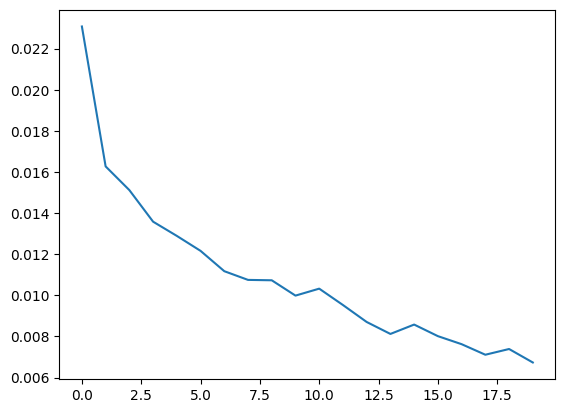

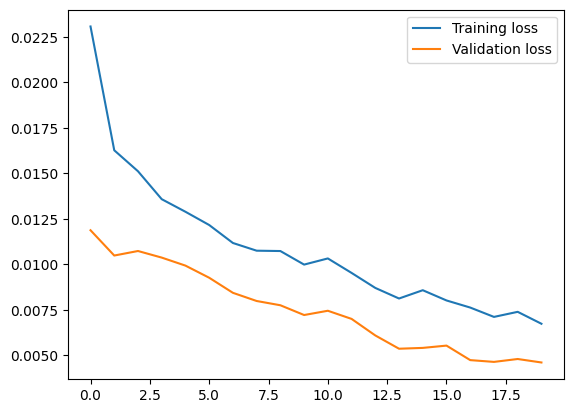

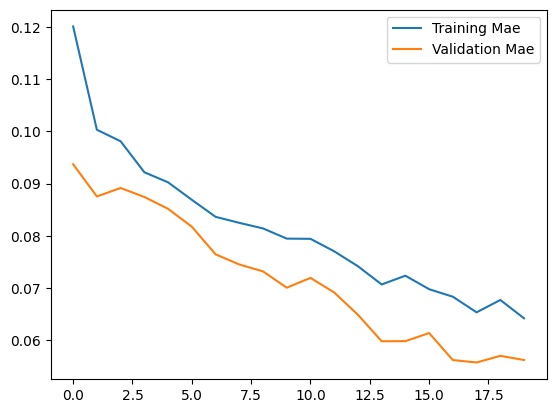

In [28]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 16ms/step


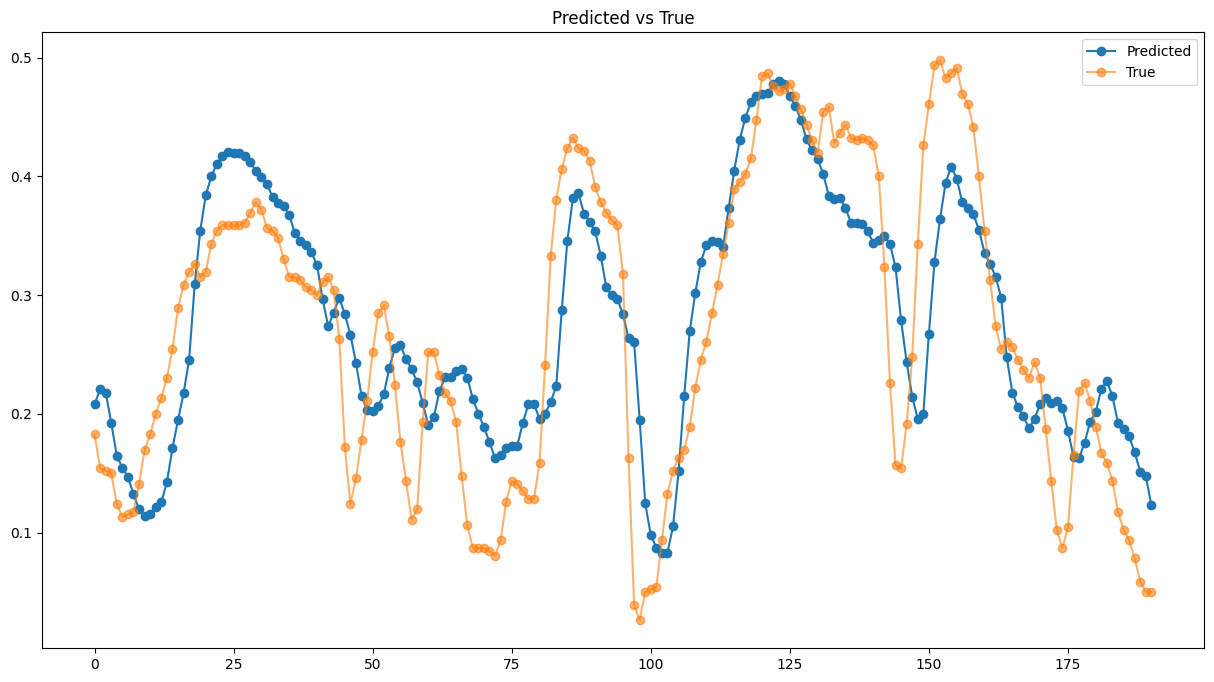

In [29]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [30]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.060287035640770925,
 'mse': 0.07264134948460227,
 'rmse': 0.005276765654944126}

# Entrenamiento Stacked LSTM sin dropout

In [31]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Stacked_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 30, 32)            4864      
                                                                 
 lstm_5 (LSTM)               (None, 32)                8320      
                                                                 
 dense_9 (Dense)             (None, 64)                2112      
                                                                 
 dense_10 (Dense)            (None, 32)                2080      
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 17,409
Trainable params: 17,409
Non-trainable params: 0
_________________________________________________________________


In [32]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/stacked_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 11s 47ms/step - loss: 0.0334 - mae: 0.1430 - mse: 0.0334 - val_loss: 0.0144 - val_mae: 0.1026 - val_mse: 0.0144
Epoch 2/50
48/48 [==============================] - 2s 33ms/step - loss: 0.0156 - mae: 0.1004 - mse: 0.0156 - val_loss: 0.0126 - val_mae: 0.0963 - val_mse: 0.0126
Epoch 3/50
48/48 [==============================] - 1s 30ms/step - loss: 0.0133 - mae: 0.0920 - mse: 0.0133 - val_loss: 0.0118 - val_mae: 0.0932 - val_mse: 0.0118
Epoch 4/50
48/48 [==============================] - 2s 41ms/step - loss: 0.0120 - mae: 0.0870 - mse: 0.0120 - val_loss: 0.0107 - val_mae: 0.0888 - val_mse: 0.0107
Epoch 5/50
48/48 [==============================] - 2s 43ms/step - loss: 0.0108 - mae: 0.0828 - mse: 0.0108 - val_loss: 0.0095 - val_mae: 0.0839 - val_mse: 0.0095
Epoch 6/50
48/48 [==============================] - 2s 43ms/step - loss: 0.0099 - mae: 0.0797 - mse: 0.0099 - val_loss: 0.0084 - val_mae: 0.0779 - val_mse: 0.0084
Epoch 7/50
48/48 [===

6/6 [==============================] - 0s 15ms/step - loss: 0.0035 - mae: 0.0484 - mse: 0.0035
test loss, test acc: [0.003519395599141717, 0.048444587737321854, 0.003519395599141717]


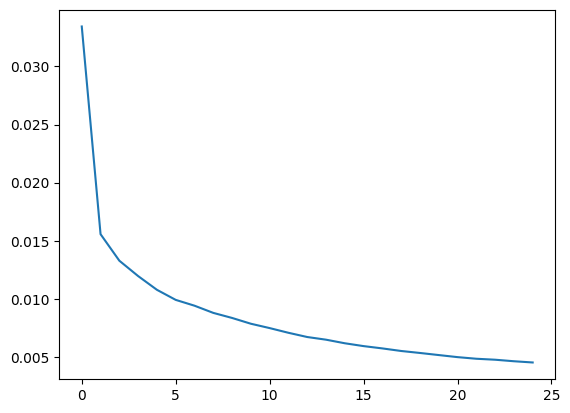

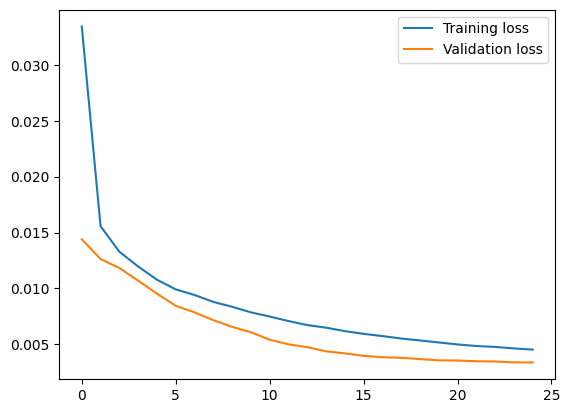

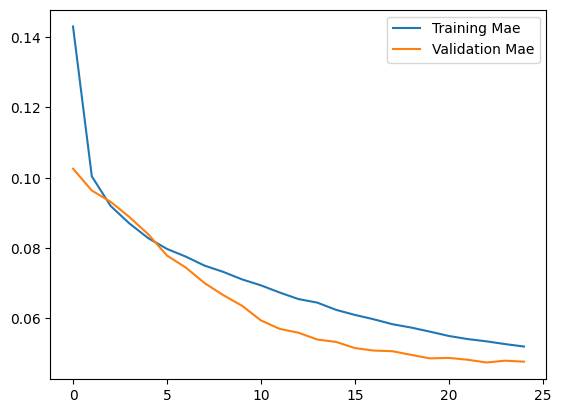

In [33]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 15ms/step


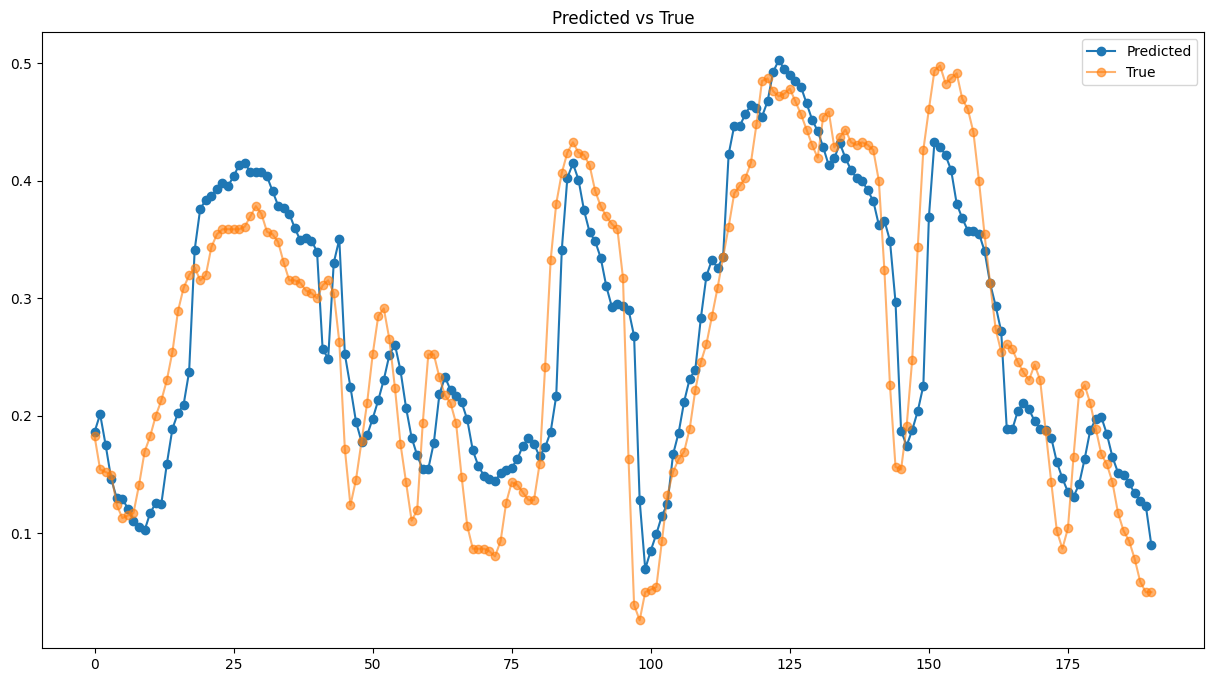

In [34]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [35]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04844459132625279,
 'mse': 0.059324493929218194,
 'rmse': 0.0035193955799578468}

# Entrenamiento Bidirectional LSTM con dropout

In [36]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 64)               9728      
 l)                                                              
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dropout_8 (Dropout)         (None, 32)                0         
                                                      

In [37]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/bidirectional_dropout.h5')

Epoch 1/50
48/48 [==============================] - 11s 51ms/step - loss: 0.0259 - mae: 0.1264 - mse: 0.0259 - val_loss: 0.0103 - val_mae: 0.0871 - val_mse: 0.0103
Epoch 2/50
48/48 [==============================] - 1s 27ms/step - loss: 0.0162 - mae: 0.1002 - mse: 0.0162 - val_loss: 0.0078 - val_mae: 0.0743 - val_mse: 0.0078
Epoch 3/50
48/48 [==============================] - 1s 27ms/step - loss: 0.0143 - mae: 0.0951 - mse: 0.0143 - val_loss: 0.0074 - val_mae: 0.0723 - val_mse: 0.0074
Epoch 4/50
48/48 [==============================] - 1s 26ms/step - loss: 0.0123 - mae: 0.0878 - mse: 0.0123 - val_loss: 0.0075 - val_mae: 0.0730 - val_mse: 0.0075
Epoch 5/50
48/48 [==============================] - 1s 21ms/step - loss: 0.0112 - mae: 0.0838 - mse: 0.0112 - val_loss: 0.0068 - val_mae: 0.0662 - val_mse: 0.0068
Epoch 6/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0106 - mae: 0.0818 - mse: 0.0106 - val_loss: 0.0065 - val_mae: 0.0659 - val_mse: 0.0065
Epoch 7/50
48/48 [===

6/6 [==============================] - 0s 11ms/step - loss: 0.0052 - mae: 0.0565 - mse: 0.0052
test loss, test acc: [0.005165141075849533, 0.05654308199882507, 0.005165141075849533]


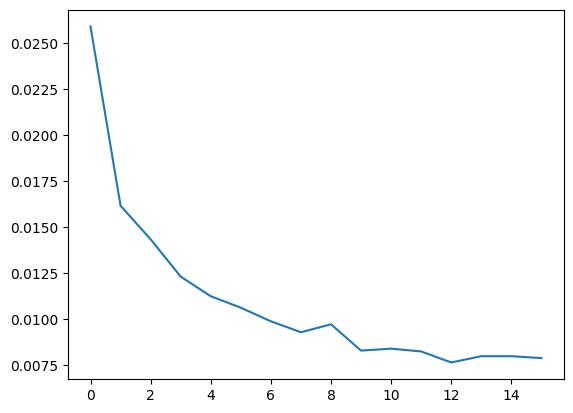

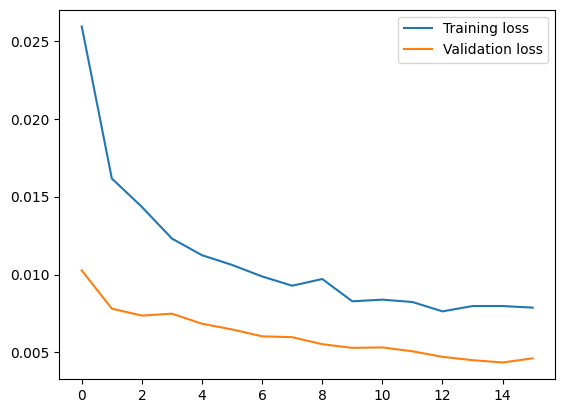

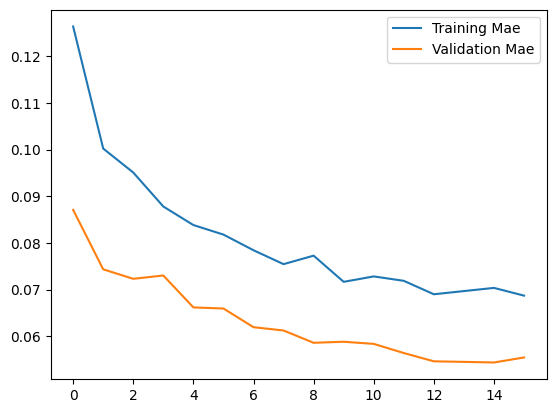

In [38]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 1s 6ms/step


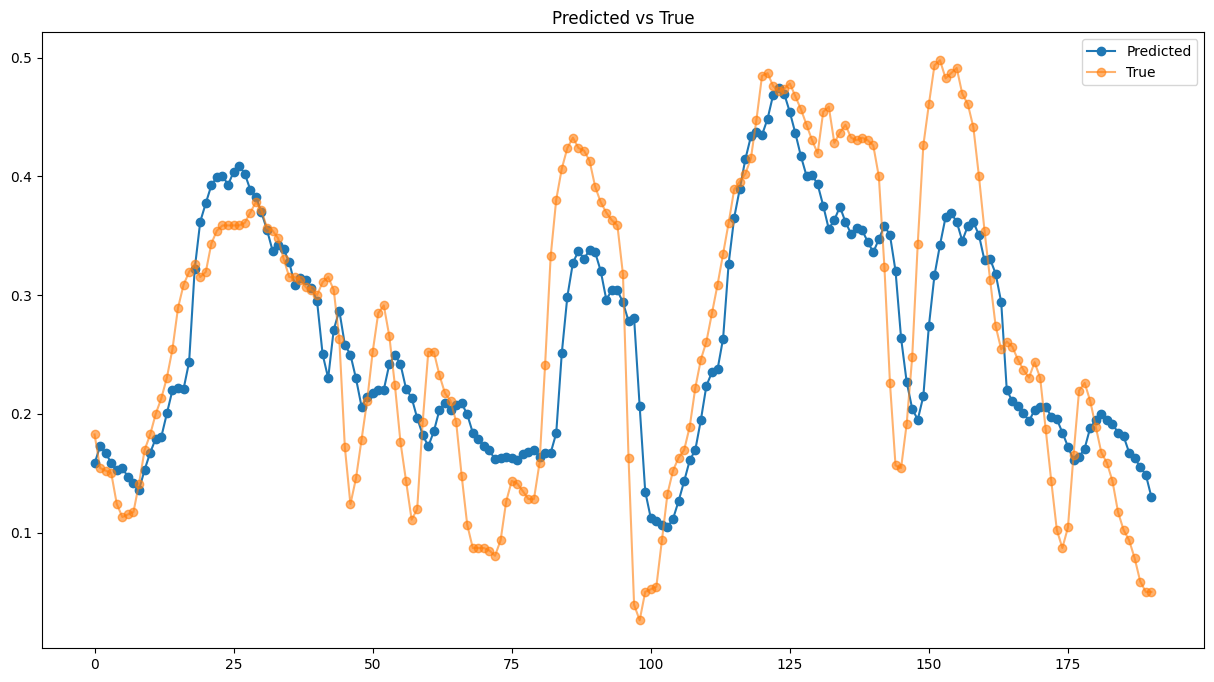

In [39]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [40]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.056543083365132314,
 'mse': 0.0718689170549548,
 'rmse': 0.005165141238651972}

# Entrenamiento Bidirectional LSTM sin dropout

In [41]:
epochs = 50
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_mae', mode='min', patience=3, min_delta=0.001)
model=model_LSTM.modelLSTM_Gen_Bidirectional_nodrop(array_Xtrain.shape[1],array_Xtrain.shape[2])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 64)               9728      
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 64)                4160      
                                                                 
 dense_16 (Dense)            (None, 32)                2080      
                                                                 
 dense_17 (Dense)            (None, 1)                 33        
                                                                 
Total params: 16,001
Trainable params: 16,001
Non-trainable params: 0
_________________________________________________________________


In [42]:
history =model.fit(array_Xtrain, array_Ytrain,epochs=epochs, validation_data=(array_Xval, array_Yval), shuffle=False, callbacks=[early_stopping])
model.save('modelos/paciente1/bidirectional_NO_dropout.h5')

Epoch 1/50
48/48 [==============================] - 15s 97ms/step - loss: 0.0176 - mae: 0.1084 - mse: 0.0176 - val_loss: 0.0086 - val_mae: 0.0807 - val_mse: 0.0086
Epoch 2/50
48/48 [==============================] - 1s 20ms/step - loss: 0.0091 - mae: 0.0767 - mse: 0.0091 - val_loss: 0.0075 - val_mae: 0.0679 - val_mse: 0.0075
Epoch 3/50
48/48 [==============================] - 1s 18ms/step - loss: 0.0078 - mae: 0.0704 - mse: 0.0078 - val_loss: 0.0073 - val_mae: 0.0667 - val_mse: 0.0073
Epoch 4/50
48/48 [==============================] - 1s 19ms/step - loss: 0.0071 - mae: 0.0671 - mse: 0.0071 - val_loss: 0.0071 - val_mae: 0.0654 - val_mse: 0.0071
Epoch 5/50
48/48 [==============================] - 1s 25ms/step - loss: 0.0067 - mae: 0.0650 - mse: 0.0067 - val_loss: 0.0068 - val_mae: 0.0634 - val_mse: 0.0068
Epoch 6/50
48/48 [==============================] - 1s 28ms/step - loss: 0.0065 - mae: 0.0634 - mse: 0.0065 - val_loss: 0.0063 - val_mae: 0.0616 - val_mse: 0.0063
Epoch 7/50
48/48 [===

6/6 [==============================] - 0s 14ms/step - loss: 0.0038 - mae: 0.0477 - mse: 0.0038
test loss, test acc: [0.0037961299531161785, 0.04771813750267029, 0.0037961299531161785]


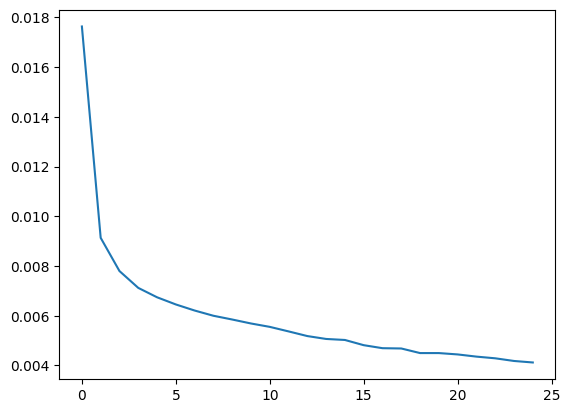

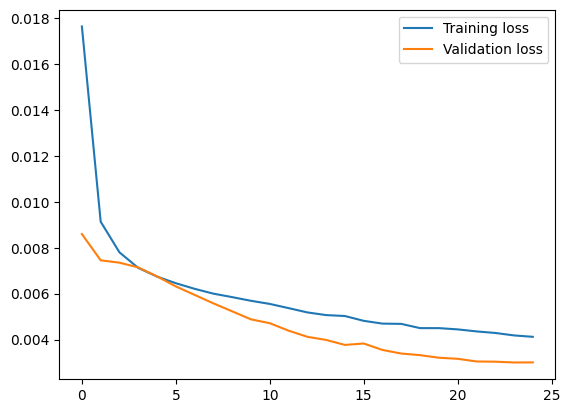

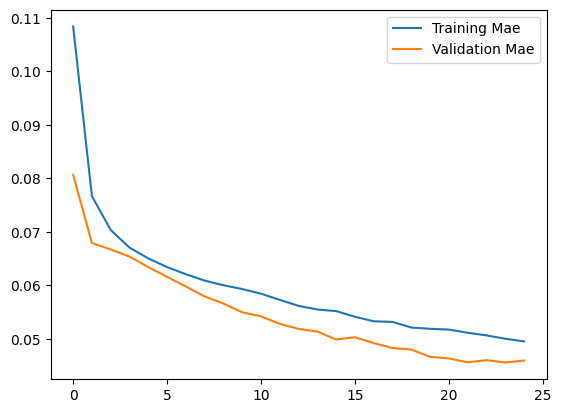

In [43]:
model_utils.modelEvaluateTraining(model,history,array_Xtest, array_Ytest)

6/6 [==============================] - 2s 10ms/step


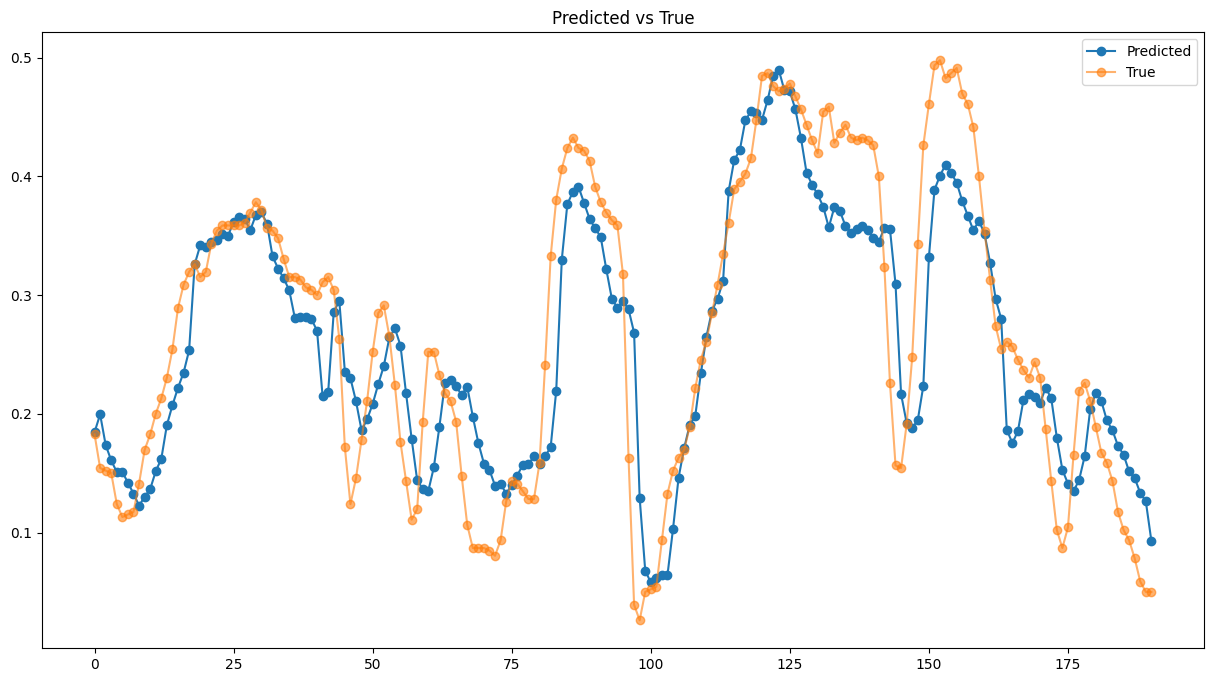

In [44]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [45]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.04771813633259163,
 'mse': 0.06161274147473942,
 'rmse': 0.0037961299120330754}